In [1]:
import re
import pandas as pd
import numpy as np
import emoji
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [2]:
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\akshy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\akshy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\akshy\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
df = pd.read_csv("C:/Users/akshy/OneDrive/Desktop/projects/INTERNSHIP/future_interns/twcs/twcs.csv") 

In [4]:
df = df[df['inbound'] == True]

In [5]:
df = df.head(80000)   # 80k rows, perfect for M

In [6]:
df.head(5)

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,1,4.0
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,4,6.0
6,8,115712,True,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,"9,6,10",NaN
8,12,115713,True,Tue Oct 31 22:04:47 +0000 2017,@sprintcare You gonna magically change your co...,"11,13,14",15.0


In [7]:
df.shape

(80000, 7)

In [8]:
def preprocess_text(text):
    if pd.isna(text):
        return ""

    text = text.lower()
    text = remove_urls(text)
    text = remove_mentions(text)
    text = remove_hashtags(text)
    text = remove_emojis(text)
    text = remove_special_chars(text)

    # FAST split
    tokens = text.split()

    # FAST stopwords list outside loop
    tokens = [t for t in tokens if t not in stopwords_set]

    return " ".join(tokens)

In [9]:
from nltk.corpus import stopwords
stopwords_set = set(stopwords.words("english"))

In [10]:
def remove_urls(text):
    return re.sub(r'http\S+|www.\S+', '', text)

def remove_mentions(text):
    return re.sub(r'@\w+', '', text)

def remove_hashtags(text):
    return re.sub(r'#\w+', '', text)

def remove_emojis(text):
    return text.encode('ascii', 'ignore').decode('ascii')

def remove_special_chars(text):
    return re.sub(r'[^a-zA-Z0-9\s]', '', text)

def preprocess_text(text):
    if pd.isna(text):
        return ""

    text = text.lower()
    text = remove_urls(text)
    text = remove_mentions(text)
    text = remove_hashtags(text)
    text = remove_emojis(text)
    text = remove_special_chars(text)

    tokens = text.split()
    tokens = [t for t in tokens if t not in stopwords_set]

    return " ".join(tokens)

# Create clean_text column
df["clean_text"] = df["text"].astype(str).apply(preprocess_text)

# Save cleaned dataset (optional)
df.to_csv("twcs_cleaned.csv", index=False)

df.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,clean_text
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0,propose
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,1,4.0,sent several private messages one responding u...
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,4,6.0,
6,8,115712,True,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,"9,6,10",NaN,worst customer service
8,12,115713,True,Tue Oct 31 22:04:47 +0000 2017,@sprintcare You gonna magically change your co...,"11,13,14",15.0,gonna magically change connectivity whole family


In [11]:
df.columns

Index(['tweet_id', 'author_id', 'inbound', 'created_at', 'text',
       'response_tweet_id', 'in_response_to_tweet_id', 'clean_text'],
      dtype='object')

In [12]:
    pip install wordcloud matplotlib

Note: you may need to restart the kernel to use updated packages.


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [14]:
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X = tfidf.fit_transform(df['clean_text'])

In [15]:
# Choose number of clusters (k)
inertia = []
K_range = range(3, 12) 

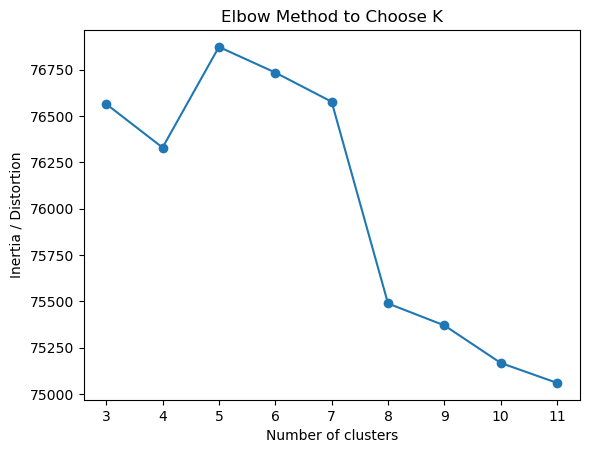

In [16]:
for k in K_range:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X)
    inertia.append(model.inertia_)

plt.plot(K_range, inertia, marker='o')
plt.title("Elbow Method to Choose K")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia / Distortion")
plt.show()

In [17]:
# Train final KMeans model
k = 8 
kmeans = KMeans(n_clusters=k, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

In [18]:
intent_labels = {
    0: "Refund/Returns",
    1: "Shipping/Order Tracking",
    2: "Account Help",
    3: "Product Issue",
    4: "General Query",
    5: "Complaint",
    6: "Positive Feedback",
    7: "Greetings"
}

In [19]:
df["intent"] = df["cluster"].map(intent_labels)
df[['clean_text', 'cluster', 'intent']].head()

,clean_text,cluster,intent
1,propose,4,General Query
2,sent several private messages one responding u...,4,General Query
4,,4,General Query
6,worst customer service,3,Product Issue
8,gonna magically change connectivity whole family,4,General Query


In [20]:
# Extract top keywords for each cluster
def get_top_keywords(cluster_centers, feature_names, n_terms=15):
    terms = []
    for i, center in enumerate(cluster_centers):
        top_ids = center.argsort()[-n_terms:]
        top_terms = [feature_names[j] for j in top_ids]
        terms.append((i, top_terms))
    return terms

In [21]:
feature_names = tfidf.get_feature_names_out()
keywords = get_top_keywords(kmeans.cluster_centers_, feature_names)

In [22]:
print("\n=== TOP KEYWORDS PER CLUSTER ===\n")
for cl, words in keywords:
    print(f"Cluster {cl}: {', '.join(words)}\n")


=== TOP KEYWORDS PER CLUSTER ===

Cluster 0: long, back, thank, dont, ive, last, get, im, one, first time, first, every time, every, yes, time

Cluster 1: please fix, number, check, help please, cant, email, fix, account, dm, hi, need help, need, please help, help, please

Cluster 2: ive, didnt, new, cant get, getting, like, going, phone, one, dont, trying, back, cant, im, get

Cluster 3: ive, im, get, today, terrible, worst customer, poor, ever, phone, call, great, worst, customer service, customer, service

Cluster 4: app, account, dm, need, sent, phone, got, done, like, cant, de, amazon, dont, one, thank

Cluster 5: issue, account, back, working, still working, ive, days, havent, get, still havent, im still, im, waiting, still waiting, still

Cluster 6: next, got, says, day delivery, days, one, ordered, amazon, package, prime, delivered, day, delivery, today, order

Cluster 7: got, response, much, thanks reply, done thanks, thanks much, great, reply, done, help, sent, thanks help, 



--- WORD CLOUD FOR CLUSTER 0 ---



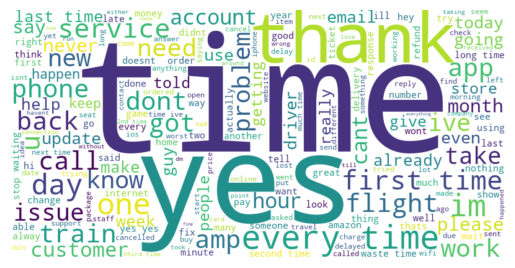



--- WORD CLOUD FOR CLUSTER 1 ---



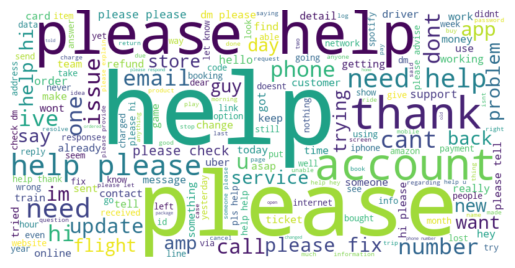



--- WORD CLOUD FOR CLUSTER 2 ---



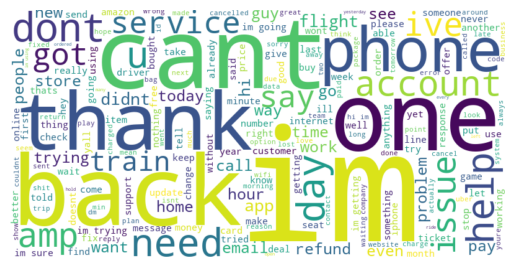



--- WORD CLOUD FOR CLUSTER 3 ---



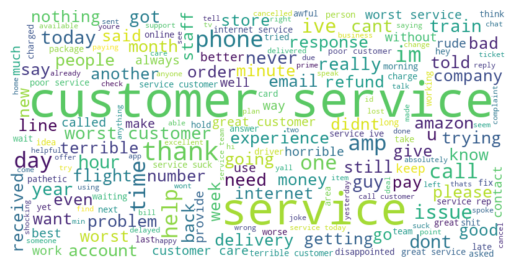



--- WORD CLOUD FOR CLUSTER 4 ---



In [ ]:
# Word Cloud for each cluster
for cl in range(k):
    cluster_text = " ".join(df[df['cluster'] == cl]['clean_text'].tolist())

    print(f"\n\n--- WORD CLOUD FOR CLUSTER {cl} ---\n")
    wc = WordCloud(width=800, height=400, background_color='white').generate(cluster_text)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import joblib

In [ ]:
df = df.dropna(subset=['clean_text', 'intent'])

In [ ]:
# 1. Prepare Input & Target
X = df['clean_text']
y = df['intent']

In [ ]:
# Train–Test Spli
X_train, X_test, y_train, y_test = train_test_split(    X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# 3. TF-IDF Vectorizer
vectorizer = TfidfVectorizer(
    max_features=4000,
    ngram_range=(1, 2),
    min_df=3
)

In [ ]:
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [ ]:
# 4. Train Logistic Regression
model = LogisticRegression(
    max_iter=2000,
    C=4,
    class_weight='balanced'   
)
model.fit(X_train_tfidf, y_train)

In [ ]:
# Evaluate
predicted = model.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, predicted))
print("\nClassification Report:\n")
print(classification_report(y_test, predicted))

In [ ]:
joblib.dump(model, "intent_model.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")

In [ ]:
print("\nModel saved as intent_model.pkl")
print("Vectorizer saved as tfidf_vectorizer.pkl")

In [ ]:
model = joblib.load("intent_model.pkl")
vectorizer = joblib.load("tfidf_vectorizer.pkl")

In [ ]:
# Create response templates for each intent
response_map = {
    "Refund/Returns": 
        "Sure! I can help with refund & return issues. Please share your Order ID.",
    
    "Shipping/Order Tracking": 
        "I can help track your order. Please provide your tracking number or order ID.",
    
    "Account Help": 
        "No problem! Please tell me what account issue you're facing (login, password, verification).",
    
    "Product Issue": 
        "Sorry about the inconvenience! Please describe the product issue and attach an image if possible.",
    
    "Complaint": 
        "I apologize for the trouble. Please share more details so I can help resolve your complaint.",
    
    "General Query": 
        "Sure! How can I help you today?",
    
    "Positive Feedback": 
        "Thank you so much! We're happy to hear your feedback ❤️",
    
    "Greetings": 
        "Hello! How can I assist you today?"
}

In [ ]:
# Predict intent + return mapped response
def predict_intent(user_message):
    clean_text = user_message.lower()
    vectorized = vectorizer.transform([clean_text])
    predicted_intent = model.predict(vectorized)[0]
    return predicted_intent

def get_response(user_message):
    intent = predict_intent(user_message)

    # If the intent exists in map
    if intent in response_map:
        return response_map[intent]
            # Fallback
    return "I'm not sure I understood. Could you please rephrase?"

In [ ]:
print(get_response("I want my money back"))

In [ ]:
print(get_response("Where is my order?"))

In [ ]:
print(get_response("hello buddy"))

In [ ]:
# *Build the Streamlit Chatbot UI*

In [ ]:
# Streamlit Customer Support Chatbot (Task-3)
import streamlit as st
import joblib
# Load ML model and vectorizer
model = joblib.load("intent_model.pkl")
vectorizer = joblib.load("tfidf_vectorizer.pkl")

In [ ]:
response_map = {
    "Refund/Returns": 
        "Sure! I can help with refund and return issues. Please share your Order ID.",
    
    "Shipping/Order Tracking": 
        "I can help track your order. Please provide your tracking number or order ID.",
    
    "Account Help": 
        "No worries, I can help with account login or password issues. What problem are you facing?",
    
    "Product Issue": 
        "I’m sorry for the trouble! Please describe the product issue in detail.",
    
    "Complaint": 
        "I'm sorry to hear that. Please share your complaint and I will escalate it.",
    
    "General Query": 
        "Sure! How can I assist you today?",
    
    "Positive Feedback": 
        "Thank you so much! We're happy to serve you ❤️",
    
    "Greetings": 
        "Hello! How can I assist you today?"
}

In [ ]:
# Chatbot Logic
def predict_intent(message):
    clean = message.lower()
    vectorized = vectorizer.transform([clean])
    intent = model.predict(vectorized)[0]
    return intent

def get_response(message):
    intent = predict_intent(message)

    if intent in response_map:
        return response_map[intent]
    else:
        return "I'm not sure I understood. Could you please rephrase?"

In [ ]:
# STREAMLIT UI
st.set_page_config(page_title="Customer Support Chatbot", page_icon="💬")
st.title("💬 Customer Support Chatbot (FutureInterns Task-3)")
st.write("Ask me anything related to refunds, orders, account issues, product problems, or general queries.")

In [ ]:
# To maintain chat history
if "chat_history" not in st.session_state:
    st.session_state.chat_history = []

In [ ]:
# Chat display area
for chat in st.session_state.chat_history:
    with st.chat_message(chat["role"]):
        st.write(chat["content"])

In [ ]:
# User input
user_input = st.chat_input("Type your message here...")

if user_input:
    # Display user message
    st.session_state.chat_history.append({"role": "user", "content": user_input})
    with st.chat_message("user"):
        st.write(user_input)

    # Bot response
    bot_reply = get_response(user_input)
    st.session_state.chat_history.append({"role": "assistant", "content": bot_reply})
    with st.chat_message("assistant"):
        st.write(bot_reply)

In [ ]:
import os
os.getcwd()